In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import pandas_profiling

In [2]:
# import scikit learn modules
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.linear_model import LinearRegression # import linear regression model
import sklearn.metrics as metrics # rsquare RMSE, etc.
import statsmodels.formula.api as sm # To build linear regression model using stats models
from patsy import dmatrices

In [3]:
data = pd.read_csv("Car_sales.csv")
data.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [5]:
data["Latest_Launch"] = pd.to_datetime(data["Latest_Launch"])

In [6]:
data.tail()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,2011-11-14,85.735655


In [7]:
data.dtypes

Manufacturer                      object
Model                             object
Sales_in_thousands               float64
four_year_resale_value           float64
Vehicle_type                      object
Price_in_thousands               float64
Engine_size                      float64
Horsepower                       float64
Wheelbase                        float64
Width                            float64
Length                           float64
Curb_weight                      float64
Fuel_capacity                    float64
Fuel_efficiency                  float64
Latest_Launch             datetime64[ns]
Power_perf_factor                float64
dtype: object

In [8]:
data["month_name"] = data.Latest_Launch.dt.month_name()
data["weekday"] = data.Latest_Launch.dt.weekday_name
data["date"] = data.Latest_Launch.dt.day.astype(str)
data.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,month_name,weekday,date
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,February,Thursday,2
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,June,Friday,3
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,January,Wednesday,4
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,March,Thursday,10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,October,Saturday,8


In [9]:
# pandas_profiling.ProfileReport(data)
# dropping the correlated variables.
data = data.drop(columns=["Power_perf_factor","Price_in_thousands"])


In [10]:
numeric_var_names = [key for key, val in dict(data.dtypes).items() if val in ["float64","int64","float32","int32"]]
cat_var_names = [key for key, val in dict(data.dtypes).items() if val in ["object"]]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']
['Manufacturer', 'Model', 'Vehicle_type', 'month_name', 'weekday', 'date']


In [11]:
data_num = data[numeric_var_names]
data_cat = data[cat_var_names]

In [12]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
data_num = data_num.apply(outlier_capping)

In [13]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x
data_num = data_num.apply(Missing_imputation)

In [14]:
def cat_missing_imputation(x):
    x = x.fillna(x.mode())
    return x
data_cat = data_cat.apply(cat_missing_imputation)

In [15]:
# converting to numerical 
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype("category")
    data_cat = create_dummies(data_cat, c_feature)

In [16]:
data_cat.columns = data_cat.columns.str.replace(" ", "_")
data_cat.columns = data_cat.columns.str.replace("-", "_")

In [17]:
# concatenating to make it a single data_frame 

data_new = pd.concat([data_num, data_cat], axis = 1)
data_new.head()

,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_29,date_3,date_30,date_31,date_4,date_5,date_6,date_7,date_8,date_9
0,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,...,0,0,0,0,0,0,0,0,0,0
1,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,...,0,1,0,0,0,0,0,0,0,0
2,14.114,18.225,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,...,0,0,0,0,1,0,0,0,0,0
3,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,...,0,0,0,0,0,0,0,0,0,0
4,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\Birender\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


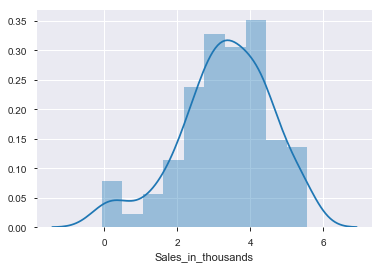

In [18]:
sns.distplot(np.log(data_new.Sales_in_thousands))

In [19]:
data_new["ln_carSales"] = np.log(data_new["Sales_in_thousands"])
data_new.head()

,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_3,date_30,date_31,date_4,date_5,date_6,date_7,date_8,date_9,ln_carSales
0,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,...,0,0,0,0,0,0,0,0,0,2.828437
1,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,...,1,0,0,0,0,0,0,0,0,3.673360
2,14.114,18.225,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,...,0,0,0,1,0,0,0,0,0,2.647167
3,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,...,0,0,0,0,0,0,0,0,0,2.150366
4,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,...,0,0,0,0,0,0,0,1,0,3.015388


In [20]:
# sns.heatmap(data_new.corr())
# corrm = data_new.corr()
# corrm.to_csv("corrm.csv")

In [21]:
features = data_new[data_new.columns.difference(["ln_carSales","Sales_in_thousands"])]
target = data_new["ln_carSales"]

In [22]:
## Feature reduction
data_new.head()

,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_3,date_30,date_31,date_4,date_5,date_6,date_7,date_8,date_9,ln_carSales
0,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,...,0,0,0,0,0,0,0,0,0,2.828437
1,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,...,1,0,0,0,0,0,0,0,0,3.673360
2,14.114,18.225,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,...,0,0,0,1,0,0,0,0,0,2.647167
3,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,...,0,0,0,0,0,0,0,0,0,2.150366
4,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,...,0,0,0,0,0,0,0,1,0,3.015388


In [23]:
features.columns.shape

(241,)

### Applying RFE (Recursive Feature Elimination)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import itertools
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(features, target)

In [25]:
for feature, select in zip(features.columns, rfe.get_support()):
    if select == True:
        print(feature, select)

Model_3000GT True
Model_A8 True
Model_Accord True
Model_Avenger True
Model_CL500 True
Model_Carrera_Cabrio True
Model_Carrera_Coupe True
Model_Cavalier True
Model_Civic True
Model_Cutlass True
Model_Diamante True
Model_Eldorado True
Model_GS400 True
Model_GTI True
Model_Grand_Cherokee True
Model_Malibu True
Model_Prowler True
Model_SLK230 True
Model_SW True
Model_Viper True


In [26]:
RFE_features = features.columns[rfe.get_support()]
RFE_features

Index(['Model_3000GT', 'Model_A8', 'Model_Accord', 'Model_Avenger',
       'Model_CL500', 'Model_Carrera_Cabrio', 'Model_Carrera_Coupe',
       'Model_Cavalier', 'Model_Civic', 'Model_Cutlass', 'Model_Diamante',
       'Model_Eldorado', 'Model_GS400', 'Model_GTI', 'Model_Grand_Cherokee',
       'Model_Malibu', 'Model_Prowler', 'Model_SLK230', 'Model_SW',
       'Model_Viper'],
      dtype='object')

### F Regression

In [27]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features, target)

In [28]:
f_reg_results = [(i,v,z) for i, v, z in zip(features.columns, F_values, ["%.3f" %p for p in p_values])]
f_reg_results = pd.DataFrame(f_reg_results, columns=["variable", "F_Value", "P_Value"])
f_reg_results

,variable,F_Value,P_Value
0,Curb_weight,0.419364,0.518
1,Engine_size,2.309178,0.131
2,Fuel_capacity,0.063404,0.802
3,Fuel_efficiency,2.906072,0.090
4,Horsepower,29.701676,0.000
5,Length,6.965105,0.009
6,Manufacturer_Audi,2.874313,0.092
7,Manufacturer_BMW,0.726643,0.395
8,Manufacturer_Buick,1.196073,0.276
9,Manufacturer_Cadillac,0.887999,0.347


In [29]:
f_reg_res = f_reg_results.sort_values(by = "F_Value", ascending = False).reset_index(drop = True).variable
f_reg_res

0       four_year_resale_value
1                   Horsepower
2            Manufacturer_Ford
3       Vehicle_type_Passenger
4                    Wheelbase
5         Manufacturer_Porsche
6      Manufacturer_Mercedes_B
7                  Model_Viper
8                 Model_3000GT
9                  Model_CL500
10                      Length
11               Model_Cutlass
12         Model_Carrera_Coupe
13                    Model_A8
14                Model_SLK230
15        Model_Carrera_Cabrio
16               Model_Prowler
17                     date_20
18          Manufacturer_Volvo
19                     date_28
20          Manufacturer_Honda
21         Manufacturer_Toyota
22                     date_29
23              Model_Explorer
24              Model_F_Series
25                 Model_Camry
26                Model_Taurus
27       Manufacturer_Plymouth
28                Model_Accord
29             Fuel_efficiency
                ...           
211                    date_15
212     

In [30]:
list_vars = set(f_reg_res[:20]).union(set(RFE_features))
list_vars

{'Horsepower',
 'Length',
 'Manufacturer_Ford',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Porsche',
 'Manufacturer_Volvo',
 'Model_3000GT',
 'Model_A8',
 'Model_Accord',
 'Model_Avenger',
 'Model_CL500',
 'Model_Carrera_Cabrio',
 'Model_Carrera_Coupe',
 'Model_Cavalier',
 'Model_Civic',
 'Model_Cutlass',
 'Model_Diamante',
 'Model_Eldorado',
 'Model_GS400',
 'Model_GTI',
 'Model_Grand_Cherokee',
 'Model_Malibu',
 'Model_Prowler',
 'Model_SLK230',
 'Model_SW',
 'Model_Viper',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'date_20',
 'date_28',
 'four_year_resale_value'}

### VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [32]:
all_columns = "+".join(list(list_vars))
my_formula = "ln_carSales ~ " + all_columns
print(my_formula)

ln_carSales ~ Model_Grand_Cherokee+Wheelbase+Vehicle_type_Passenger+Model_Cavalier+date_28+Model_SW+Model_Prowler+Model_A8+Manufacturer_Porsche+Model_Avenger+Horsepower+Model_Diamante+Model_Eldorado+Model_Malibu+Length+Model_Carrera_Cabrio+Model_GTI+Model_GS400+Model_Civic+Model_Viper+Model_Accord+Model_SLK230+four_year_resale_value+Model_Cutlass+Model_CL500+date_20+Model_3000GT+Model_Carrera_Coupe+Manufacturer_Mercedes_B+Manufacturer_Volvo+Manufacturer_Ford


In [45]:
my_formula = "ln_carSales ~ Model_A8+Model_Accord+date_20+Model_Grand_Cherokee+Horsepower+\
Model_Cavalier+Model_3000GT+Model_Civic+Model_GTI+Manufacturer_Mercedes_B+Length+\
Model_SW+Model_CL500+Model_GS400+Manufacturer_Volvo+Model_Carrera_Coupe+Vehicle_type_Passenger+\
date_28+Model_Diamante+Model_Malibu+Model_Cutlass+Model_Eldorado+\
Model_Carrera_Cabrio+Model_SLK230+Model_Prowler+Manufacturer_Ford+\
Model_Viper+Model_Avenger"

In [46]:
# get y and x dataframes based on this regression
y, x = dmatrices(my_formula, data_new, return_type = "dataframe")

In [47]:
variance_inflation_factor(x.values, 1)

1.0762422251278727

In [48]:
# variance for each x, calculate and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,298.4,Intercept
1,1.1,Model_A8
2,1.2,Model_Accord
3,1.3,date_20
4,1.0,Model_Grand_Cherokee
5,2.3,Horsepower
6,1.0,Model_Cavalier
7,1.0,Model_3000GT
8,1.0,Model_Civic
9,1.0,Model_GTI


### Sampling

In [49]:
train, test = train_test_split(data_new, test_size = 0.3, random_state = 123)
print(len(train))
print(len(test))

109
48


In [96]:
my_formula = "ln_carSales ~ Model_A8+Model_Grand_Cherokee+Horsepower+Model_3000GT+Model_GTI+Length+\
Model_SW+Model_CL500+Manufacturer_Volvo+Vehicle_type_Passenger+date_28+Model_SLK230+Manufacturer_Ford+\
Model_Avenger"

In [97]:
model = sm.ols(my_formula, data = train)
model = model.fit()

In [98]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ln_carSales   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     20.48
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           4.49e-22
Time:                        00:51:36   Log-Likelihood:                -109.64
No. Observations:                 109   AIC:                             247.3
Df Residuals:                      95   BIC:                             285.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [99]:
np.exp(model.predict(test))

24       2.769362
23      31.087701
138     25.432046
87      71.449981
134     40.085905
86      70.915552
88      81.062730
142     45.998460
116     75.462904
108     63.546409
137     72.152689
53     295.834958
95       3.603903
110     52.081606
8       18.129418
65      21.013793
42     118.749051
74      28.229755
132     72.916060
41      65.374776
13      37.191471
104     76.609697
31      66.695417
33      52.757250
36      48.744785
61      53.036017
72       1.548663
59      57.849750
20      44.154963
37      38.587652
28      50.042656
60      24.132665
125      3.369671
7        6.806556
127     42.210039
4       37.570506
62      55.520389
130     86.600321
29      50.184585
139     33.005531
0       35.445630
121     37.966066
115     67.450774
101     53.104001
128     25.838894
114     43.149877
5       29.718360
16      13.126006
dtype: float64

In [100]:
train["pred"] = pd.DataFrame(np.exp(model.predict(train)))
test["pred"] = pd.DataFrame(np.exp(model.predict(test)))

C:\Users\Birender\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Birender\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
train.head()

,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_30,date_31,date_4,date_5,date_6,date_7,date_8,date_9,ln_carSales,pred
45,181.749,12.025,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,...,0,0,0,0,0,0,0,0,5.202627,75.462904
129,80.620,9.200,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,...,0,0,0,0,0,0,0,0,4.389747,77.086755
79,26.232,8.325,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,...,0,0,0,0,0,0,0,0,3.266980,55.893615
153,15.245,14.180,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,...,0,0,0,0,0,0,0,0,2.724252,13.731357
35,76.034,7.750,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,...,0,0,0,0,0,0,0,0,4.331181,43.149877


### Accuracy metrics

In [102]:
train.head()

,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_30,date_31,date_4,date_5,date_6,date_7,date_8,date_9,ln_carSales,pred
45,181.749,12.025,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,...,0,0,0,0,0,0,0,0,5.202627,75.462904
129,80.620,9.200,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,...,0,0,0,0,0,0,0,0,4.389747,77.086755
79,26.232,8.325,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,...,0,0,0,0,0,0,0,0,3.266980,55.893615
153,15.245,14.180,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,...,0,0,0,0,0,0,0,0,2.724252,13.731357
35,76.034,7.750,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,...,0,0,0,0,0,0,0,0,4.331181,43.149877


In [107]:
# Train data
MAPE_train = np.mean(np.abs(train.Sales_in_thousands - train.pred)/train.Sales_in_thousands)
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Sales_in_thousands, train.pred)
print(RMSE_train)

Corr_train = stats.pearsonr(train.Sales_in_thousands, train.pred)
print(Corr_train)

# Test 
MAPE_test = np.mean(np.abs(test.Sales_in_thousands - test.pred)/test.Sales_in_thousands)
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Sales_in_thousands, test.pred)
print(RMSE_test)

Corr_test = stats.pearsonr(test.Sales_in_thousands, test.pred)
print(Corr_test)

0.6016904843095122
3002.552994358911
(0.610920922636085, 1.734962540021167e-12)
2.779089867319644
2363.869789153685
(0.42914803807085034, 0.0023374457419643438)


### Decile analysis


In [108]:
train["Decile"] = pd.qcut(train["pred"], 10, labels = False)
train.head()

C:\Users\Birender\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,date_31,date_4,date_5,date_6,date_7,date_8,date_9,ln_carSales,pred,Decile
45,181.749,12.025,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,...,0,0,0,0,0,0,0,5.202627,75.462904,8
129,80.620,9.200,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,...,0,0,0,0,0,0,0,4.389747,77.086755,8
79,26.232,8.325,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,...,0,0,0,0,0,0,0,3.266980,55.893615,7
153,15.245,14.180,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,...,0,0,0,0,0,0,0,2.724252,13.731357,1
35,76.034,7.750,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,...,0,0,0,0,0,0,0,4.331181,43.149877,5


In [109]:
avg_actual = train[["Decile", "Sales_in_thousands"]].groupby(train.Decile).mean().sort_index(ascending = False)["Sales_in_thousands"]
avg_pred = train[["Decile", "pred"]].groupby(train.Decile).mean().sort_index(ascending = False)["pred"]

In [110]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis = 1)


In [111]:
Decile_analysis_train

,Sales_in_thousands,pred
Decile,,
9,156.892240,183.595640
8,103.051727,74.995864
7,77.869727,58.502456
6,60.432455,48.590382
5,46.995400,39.340093
4,40.863636,32.552428
3,24.318364,23.582182
2,36.206000,17.697186
1,12.682182,11.334276
